# Convolutional Neural Network – Implementation
---

## MNIST dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Number of images in the training set:', X_train.shape[0])
print('Number of images in the test set:', X_test.shape[0])
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 12s 1us/step
Number of images in the training set: 60000
Number of images in the test set: 10000
(60000, 28, 28)
(10000, 28, 28)


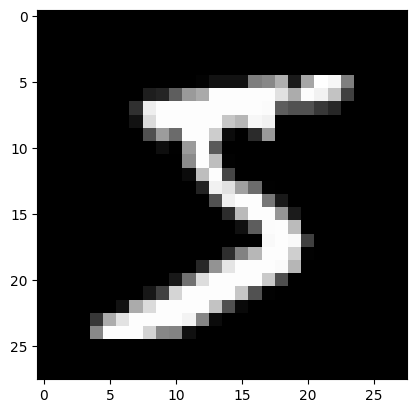

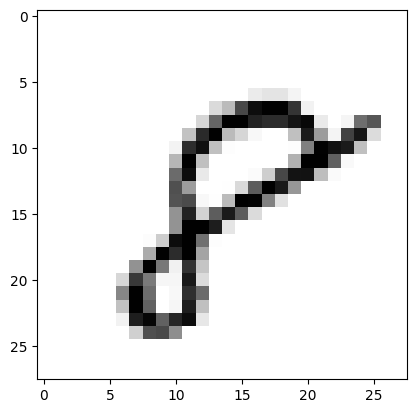

In [5]:
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap = 'gray')
plt.show()
plt.imshow(X_train[59999], cmap = 'Greys')
plt.show()

In [7]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)
print(X_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

In [11]:
# Input Scaling

X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

In [13]:
# One-Hot Encoding the Labels

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('The first sample class:', y_train[0])

The first sample class: [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Normalization btw [0, 1]
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

print('class:', y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('class:', y_train[0])

class: 5
class: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/cnn1_best.keras'

# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30,
batch_size = 200, verbose = 1, callbacks = [early_stopping_callback])

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

Epoch 1/30
225/225 [==============================] - 3s 13ms/step - loss: 3.6995e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9793
Epoch 2/30
225/225 [==============================] - 3s 13ms/step - loss: 3.3828e-04 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9795
Epoch 3/30
225/225 [==============================] - 3s 13ms/step - loss: 3.0503e-04 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9792
Epoch 4/30
225/225 [==============================] - 3s 13ms/step - loss: 3.0015e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9799
Epoch 5/30
225/225 [==============================] - 3s 13ms/step - loss: 2.6788e-04 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9794
Epoch 6/30
225/225 [==============================] - 3s 13ms/step - loss: 2.2358e-04 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9795
Epoch 7/30
225/225 [==============================] - 3s 13ms/step - loss: 2.0190e-04 - accuracy: 1.0000 - val_loss: 0

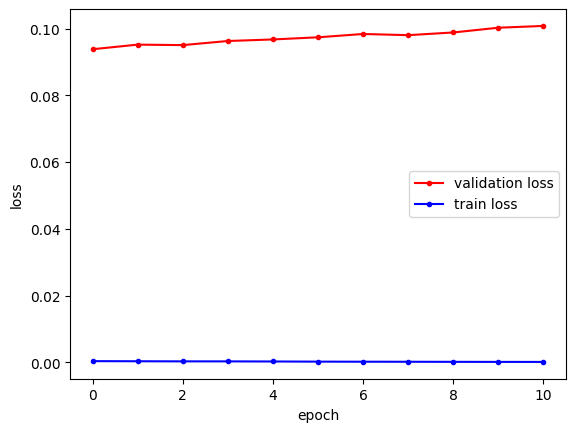

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# validation loss
y_vloss = history.history['val_loss']

# train loss
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

class:  5
class:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/30
225/225 [==============================] - 4s 14ms/step - loss: 0.3417 - accuracy: 0.9042 - val_loss: 0.1863 - val_accuracy: 0.9459
Epoch 2/30
225/225 [==============================] - 3s 13ms/step - loss: 0.1463 - accuracy: 0.9579 - val_loss: 0.1375 - val_accuracy: 0.9603
Epoch 3/30
225/225 [==============================] - 3s 13ms/step - loss: 0.0983 - accuracy: 0.9721 - val_loss: 0.1118 - val_accuracy: 0.9668
Epoch 4/30
225/225 [==============================] - 3s 12ms/step - loss: 0.0715 - accuracy: 0.9796 - val_loss: 0.0984 - val_accuracy: 0.9703
Epoch 5/30
225/225 [==============================] - 3s 13ms/step - loss: 0.0537 - accuracy: 0.9850 - val_loss: 0.0911 - val_accuracy: 0.9730
Epoch 6/30
225/225 [==============================] - 3s 14ms/step - loss: 0.0410 - accuracy: 0.9891 - val_loss: 0.0839 - val_accuracy: 0.9741
Epoch 7/30
225/225 [==============================] - 3s 13ms/step - loss: 0.0315 - accuracy

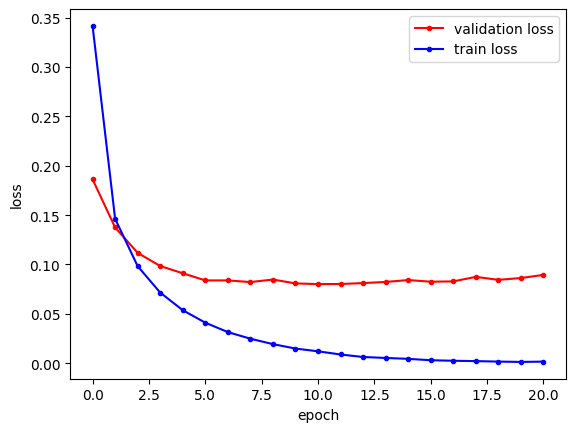

In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

# drive.mount('/content/drive')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalization btw [0, 1]
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

print('class: ', y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('class: ', y_train[0])

# Simple deep learning model
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/cnn1_best.keras'
# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1,
# save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200,
verbose = 1, callbacks = [early_stopping_callback])

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))
y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

# drive.mount('/content/drive')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalization btw [0, 1]
X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.astype('float32')
X_test = X_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Simple deep learning model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =
['accuracy'])

# modelpath = '/content/drive/MyDrive/Colab Notebooks/data/model/cnn2_best.keras'
# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose =
# 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size= 200, verbose = 1, callbacks = [early_stopping_callback])

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/30
225/225 [==============================] - 44s 188ms/step - loss: 0.3365 - accuracy: 0.8944 - val_loss: 0.0819 - val_accuracy: 0.9749
Epoch 2/30
225/225 [==============================] - 43s 192ms/step - loss: 0.1074 - accuracy: 0.9685 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 3/30
225/225 [==============================] - 43s 191ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.0513 - val_accuracy: 0.9844
Epoch 4/30
225/225 [==============================] - 42s 187ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0440 - val_accuracy: 0.9876
Epoch 5/30
225/225 [==============================] - 42s 186ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 6/30
225/225 [==============================] - 44s 196ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0445 - val_accuracy: 0.9873
Epoch 7/30
 45/225 [=====>........................] - ETA: 33s - loss: 0.0368 - accuracy: 0.9898

KeyboardInterrupt: 